In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def potential_sphere(X, Y, Z, X0, Y0, Z0, R, Grho):
    
    assert np.isscalar(X0), 'X0 must be a scalar'
    assert np.isscalar(Y0), 'Y0 must be a scalar'
    assert np.isscalar(Z0), 'Z0 must be a scalar'
    assert np.isscalar(R), 'R must be a scalar'
    assert R > 0, 'R must be positive'
    assert np.isscalar(Grho), 'Grho must be a scalar'
    X = np.asarray(X)
    Y = np.asarray(Y)
    Z = np.asarray(Z)
    assert X.shape == Y.shape == Z.shape, 'X, Y and Z must have the same shape'

    r = np.sqrt((X-X0)**2 + (Y-Y0)**2 + (Z-Z0)**2)
    origin = (r == 0)
    inside = (r < R)
    outside = (r >= R)
    potential = np.empty_like(X)
    potential[origin] = (2*np.pi*Grho)*(r[origin]**2)
    potential[inside] = (2*np.pi*Grho)*(R**2 - (r[inside]**2)/3)
    potential[outside] = (4*np.pi*Grho*(R**3)/3)*(1/r[outside])

    return potential

In [3]:
R0 = 100
X0, Y0, Z0 = 0, 0, 0
Grho0 = 1e-5

In [4]:
Y, Z = np.meshgrid(np.linspace(0, 500, 501),
                   np.linspace(0, 500, 501))
X = np.zeros_like(Y)

In [5]:
V0 = potential_sphere(X, Y, Z, X0, Y0, Z0, R0, Grho0)

In [6]:
# sphere 0
theta = np.linspace(0, np.pi/2, 200)
Z_sphere0 = Z0 + R0*np.cos(theta)
Y_sphere0 = Y0 + R0*np.sin(theta)

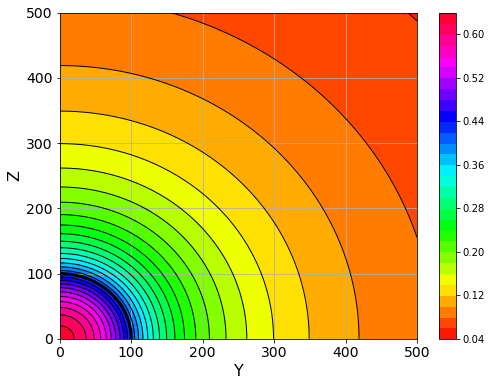

In [7]:
plt.figure(figsize=(8,6))
plt.contourf(Y, Z, V0, 30, cmap='hsv')
plt.colorbar()
plt.contour(Y, Z, V0, 30, colors='k', linewidths=1)
plt.plot(Y_sphere0, Z_sphere0, 'k-', linewidth=3)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Z', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

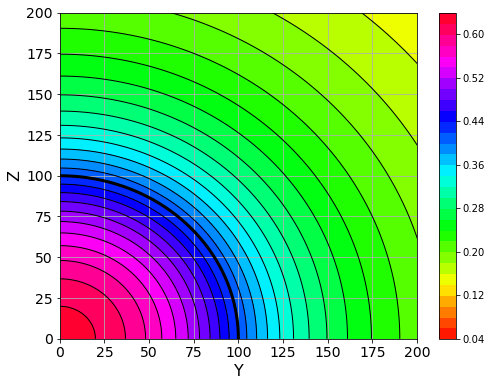

In [8]:
plt.figure(figsize=(8,6))
plt.contourf(Y, Z, V0, 30, cmap='hsv')
plt.colorbar()
plt.contour(Y, Z, V0, 30, colors='k', linewidths=1)
plt.plot(Y_sphere0, Z_sphere0, 'k-', linewidth=3)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Z', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,200)
plt.ylim(0,200)
plt.grid()
plt.show()

In [19]:
R1 = 10
Grho1 = 7e-5
X1, Y1, Z1 = 0, 60, 60

In [20]:
V1 = potential_sphere(X, Y, Z, X1, Y1, Z1, R1, Grho1)

In [21]:
# sphere 1
theta = np.linspace(0, 2*np.pi, 360)
Z_sphere1 = Z1 + R1*np.cos(theta)
Y_sphere1 = Y1 + R1*np.sin(theta)

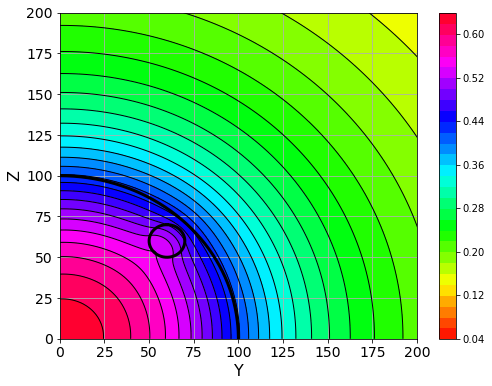

In [22]:
plt.figure(figsize=(8,6))
plt.contourf(Y, Z, V0+V1, 30, cmap='hsv')
plt.colorbar()
plt.contour(Y, Z, V0+V1, 30, colors='k', linewidths=1)
plt.plot(Y_sphere0, Z_sphere0, 'k-', linewidth=3)
plt.plot(Y_sphere1, Z_sphere1, 'k-', linewidth=3)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Z', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,200)
plt.ylim(0,200)
plt.grid()
plt.show()

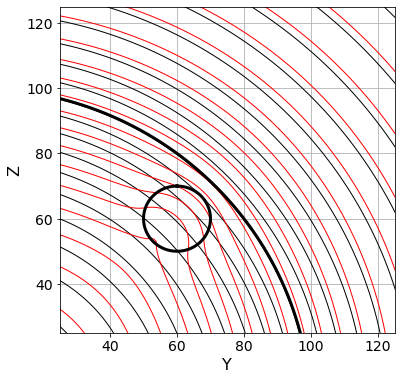

In [23]:
plt.figure(figsize=(6,6))
V0_contour = plt.contour(Y, Z, V0, 30, colors='k', linewidths=1)
plt.contour(Y, Z, V0+V1, levels=V0_contour.levels, colors='r', linewidths=1)
plt.plot(Y_sphere0, Z_sphere0, 'k-', linewidth=3)
plt.plot(Y_sphere1, Z_sphere1, 'k-', linewidth=3)
plt.xlabel('Y', fontsize=16)
plt.ylabel('Z', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(25,125)
plt.ylim(25,125)
plt.grid()
plt.show()

In [24]:
V0_contour.levels

array([0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24,
       0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46,
       0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64])